# Simulate SDEs


We will simulate stochastic processes that satisfy the following SDEs
1) Geometric Brownian motion $$dS_t=S_t dB_t + (\mu+\frac{1}{2})S_tdt, S_0=1$$
2) Ornstein-Uhlenbeck process $$dX_t = -X_tdt + dB_t, X_0 = 1$$
3) A diffusion process $$ dX_t = \sqrt{1+X_t^2} dB_t + \sin{X_t}dt$$

To simulate a time-homogeneous diffusion SDE $$ dX_t = \sigma{(X_t)}dB_t + \mu(X_t)dt, X_0=x$$
We consider a partition of the process and the increment $$ X_{t_{j+1}} - X_{t_j} = \int_{t_j}^{t_{j+1}} \sigma(X_s)dB_s + \int_{t_j}^{t_{j+1}} \mu(X_s)ds$$
If $\sigma$ and $\mu$ are smooth function, we can apply Itô’s formula to them and get
$$ \sigma(X_s) = \sigma(X_{t_j}) + \int_{t_j}^s \sigma'(X_u)du + \int_{t_j}^s \frac12 \sigma''(X_u)(dX_u)^2$$
$$ \mu(X_s) = \mu$(X_{t_j}) + \int_{t_j}^s \mu'(X_u)du + \int_{t_j}^s \frac12 \mu$''(X_u)(dX_u)^2 $$

We can approximate the increment with different precision using different estimate for $\sigma(X_s)$ and $\mu(X_s)$
1) Euler-Maruyama scheme
Simply approximate $\sigma(X_s) \approx \sigma(X_{t_j})$ and $\mu(X_s) \approx \mu(X_{t_j})$
Then we get $$X_{t_{j+1}} - X_{t_j} \approx \sigma(X_{t_j})(B_{t_{j+1}} - B_{t_j}) + \mu(X_{t_j})(B_{t_{j+1}} - B_{t_j}) $$

2) Milstein scheme
One order further than Euler scheme such that it also considers the integral in $dX_u$, it takes $dX_u = \sigma(X_{t_j})dB_u$. Hence,
$$\sigma(X_s) \approx \sigma(X_{t_j}) + \sigma'(X_{t_j})\sigma(X_{t_j})\int_{t_j}^sdB_u = \sigma(X_{t_j}) + \sigma'(X_{t_j})\sigma(X_{t_j})(B_s-B_{t_j})
$$
Therefore, we get the increment
$$X_{t_{j+1}} - X_{t_j} \approx \sigma(X_{t_j})(B_{t_{j+1}} - B_{t_j}) + \mu(X_{t_j})(B_{t_{j+1}} - B_{t_j}) + \frac{\sigma'(X_{t_j})\sigma(X_{t_j})}{2} \{(B_{t_{j+1}}-B_{t_j})^2-(t_{j+1}-t_j)\}
$$


Text(0.5, 0.98, 'Simulation of SDEs with different scheme')

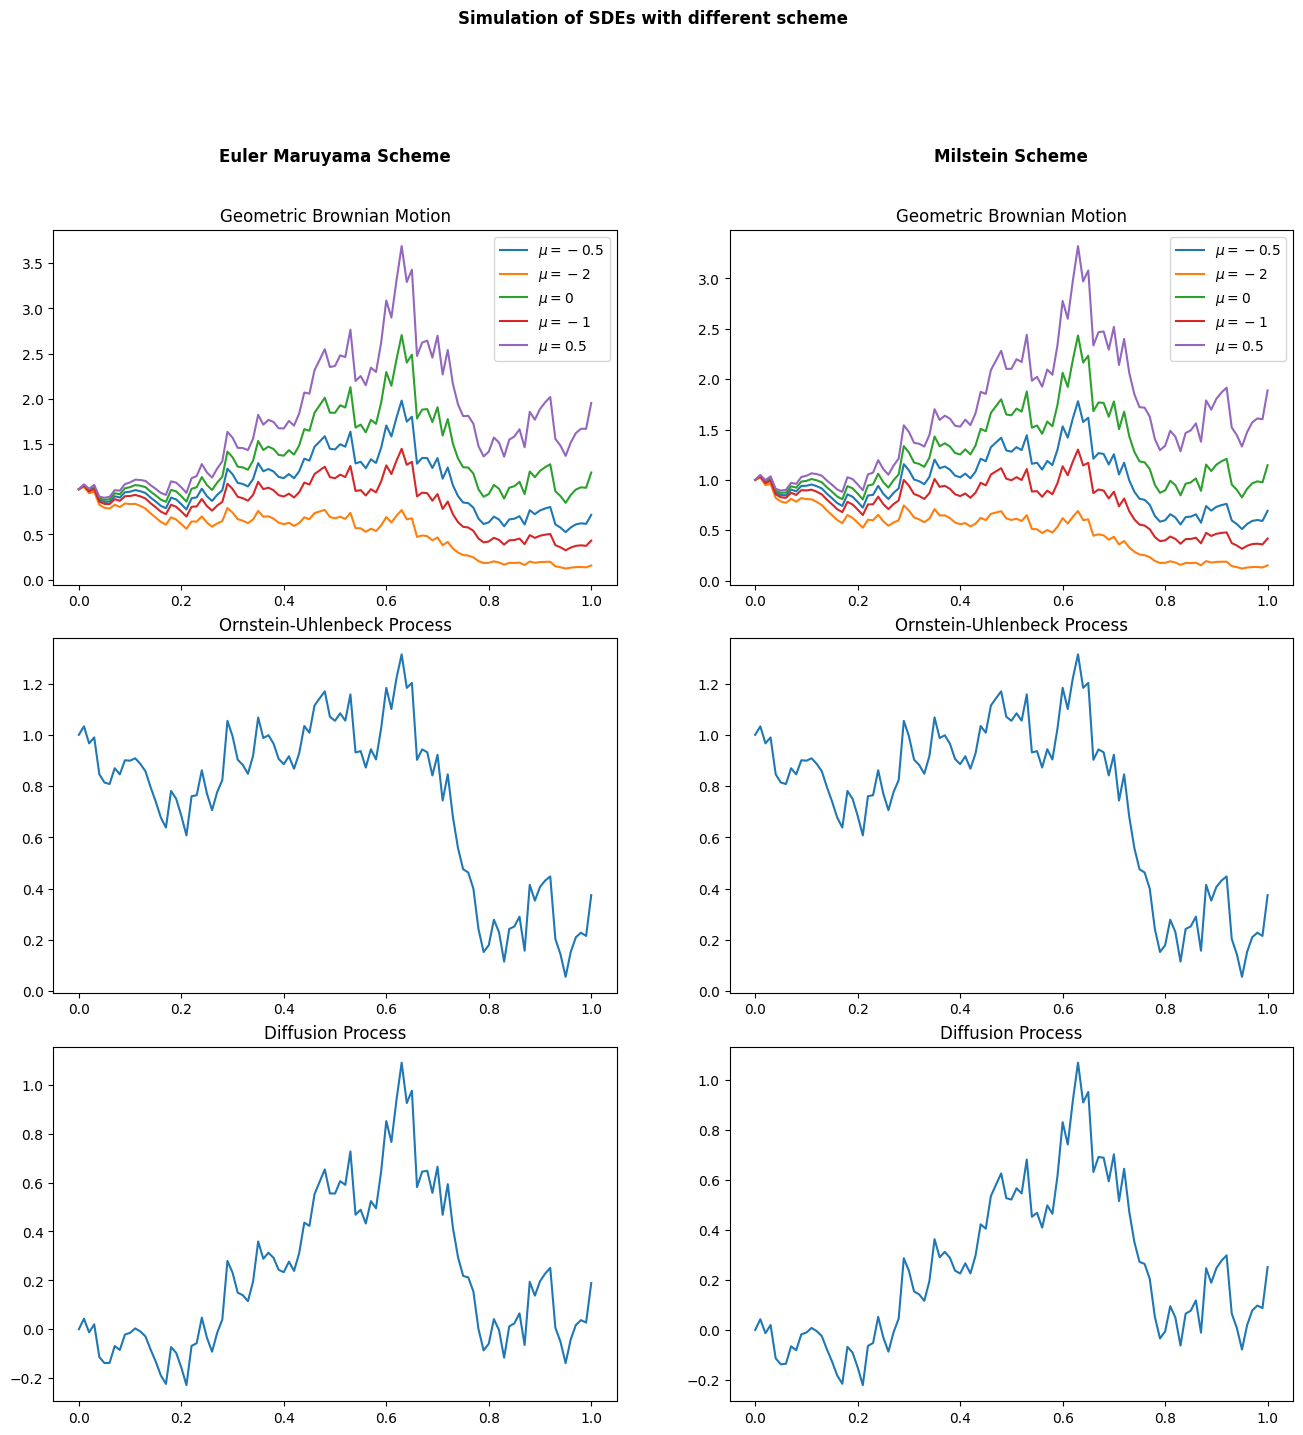

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sde import brownian_motion, GeometricBrownian, OrnsteinUhlenbeck, Diffusion, euler_maruyama, milstein

fig, axes = plt.subplots(nrows=1+3, ncols=2, figsize=(16, 16), gridspec_kw={"height_ratios":[0.02,1,1,1]})
MU = [-1/2, -2, 0, -1, 1/2]
X = []
n = 101
T = 1
t = np.linspace(0, T, n)
b = brownian_motion(n=n, T=T)
for mu in MU:
    x = GeometricBrownian(mu=mu).sample(euler_maruyama, x0=1, n=n, T=T, b=b)
    X.append(x)
X = np.asarray(X).T

axes[0,0].axis('off')
axes[0,0].set_title('Euler Maruyama Scheme', fontweight='bold')


axes[1,0].plot(t, X)
axes[1,0].set_title('Geometric Brownian Motion')
axes[1,0].legend([f'$\mu = {mu}$' for mu in MU])

ou_process = OrnsteinUhlenbeck().sample(euler_maruyama, x0=1, n=n, T=T, b=b)
axes[2,0].plot(t, ou_process)
axes[2,0].set_title('Ornstein-Uhlenbeck Process')

diffusion = Diffusion().sample(euler_maruyama, x0=0, n=n, T=T, b=b)
axes[3,0].plot(t, diffusion)
axes[3,0].set_title('Diffusion Process')


X = []
for mu in MU:
    x = GeometricBrownian(mu=mu).sample(milstein, x0=1, n=n, T=T, b=b)
    X.append(x)
X = np.asarray(X).T

axes[0,1].axis('off')
axes[0,1].set_title('Milstein Scheme', fontweight='bold')

axes[1,1].plot(t, X)
axes[1,1].set_title('Geometric Brownian Motion')
axes[1,1].legend([f'$\mu = {mu}$' for mu in MU])

ou_process = OrnsteinUhlenbeck().sample(milstein, x0=1, n=n, T=T, b=b)
axes[2,1].plot(t, ou_process)
axes[2,1].set_title('Ornstein-Uhlenbeck Process')

diffusion = Diffusion().sample(milstein, x0=0, n=n, T=T, b=b)
axes[3,1].plot(t, diffusion)
axes[3,1].set_title('Diffusion Process')

fig.suptitle('Simulation of SDEs with different scheme', fontweight='bold')
# plt.title('Geometric Brownian Motion')



# Euler vs Milstein Error Analysis

Text(0.5, 1.0, 'Eular Maruyama mean absolute error against number of sample in each path')

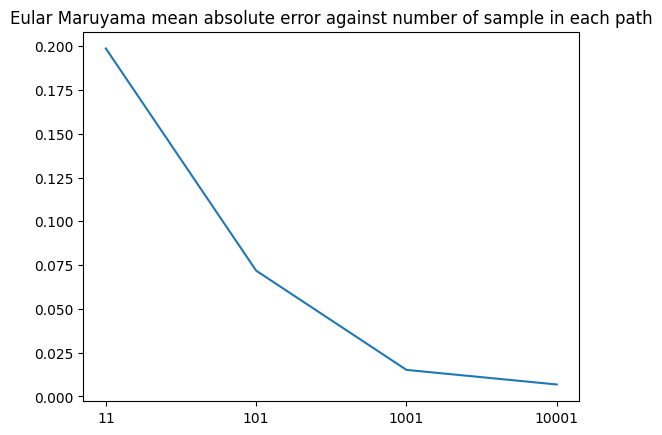

In [11]:
ns = [11, 101, 1001, 10001]
T = 1
mu = -1/2
n_samples = 100
gb = GeometricBrownian(mu=mu)
X = []
E = []
for n in ns:
    errors=[]
    for i in range(n_samples):
        b = brownian_motion(n, T)
        x = gb.sample(euler_maruyama, x0=1, n=n, T=T, b=b)
        t = np.linspace(0, T, n)
        # analytic = np.exp(b-t/2)
        analytic = gb.analytic(x0=1, n=n, T=T, b=b)
        error = np.abs(analytic[-1]-x[-1])
        errors.append(error)
    E.append(np.mean(errors))

plt.plot([str(n) for n in ns], E)
plt.title('Eular Maruyama mean absolute error against number of sample in each path')

Text(0.5, 1.0, 'Milstein mean absolute error against number of sample in each path')

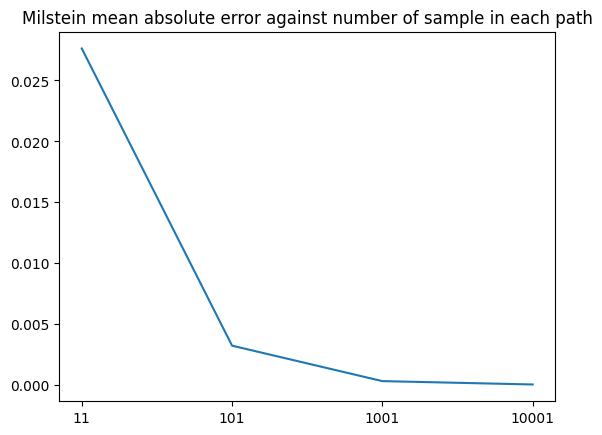

In [3]:
ns = [11, 101, 1001, 10001]
T = 1
mu = -1/2
n_samples = 100
gb = GeometricBrownian(mu=mu)
X = []
E = []
for n in ns:
    errors=[]
    for i in range(n_samples):
        b = brownian_motion(n, T)
        x = gb.sample(milstein, x0=1, n=n, T=1, b=b)
        t = np.linspace(0, T, n)
        # analytic = np.exp(b-t/2)
        analytic = gb.analytic(x0=1, n=n, T=T, b=b)
        error = np.abs(analytic[-1]-x[-1])
        errors.append(error)
    E.append(np.mean(errors))

plt.plot([str(n) for n in ns], E)
plt.title('Milstein mean absolute error against number of sample in each path')

# The CIR Model

C:\Users\david\projects\Stochastic Calculus Louis-Pierre Arguin\sde.py:66: RuntimeWarning: invalid value encountered in sqrt
  super().__init__(volatility=lambda x: sigma(x)*np.sqrt(x), drift=lambda x: a-b*x,
C:\Users\david\projects\Stochastic Calculus Louis-Pierre Arguin\sde.py:67: RuntimeWarning: invalid value encountered in sqrt
  d_volatility=lambda x: d_sigma(x)*np.sqrt(x) + sigma(x)/(2*np.sqrt(x)))


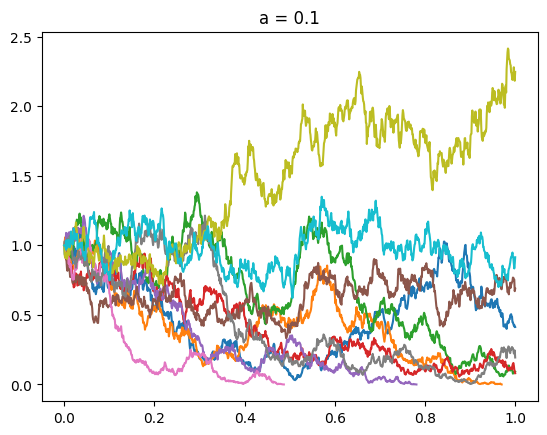

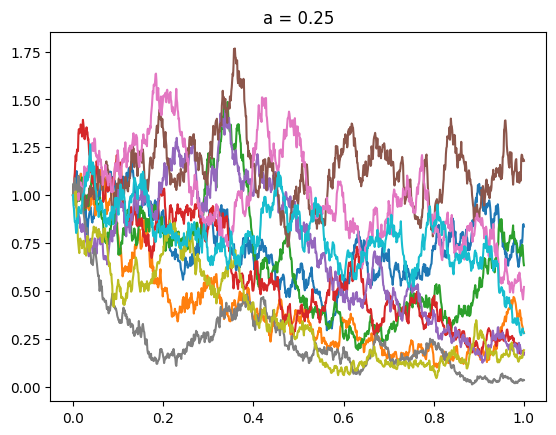

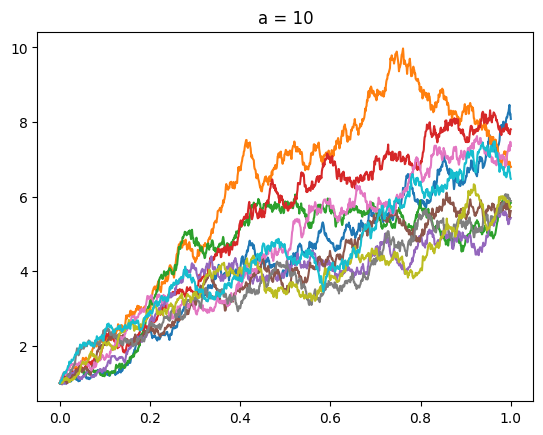

In [4]:
from sde import CIR

dt = 0.001
T = 1
n = int(T/dt + 1)
x0 = 1

A = [0.1, 0.25, 10]

for a in A:
    plt.figure()
    t = np.linspace(0, T, n)
    cir = CIR(a=a, b=1, sigma=lambda x:1, d_sigma=lambda x:0)
    X = [cir.sample(milstein, x0=x0, n=n, T=T) for _ in range(10)]
    X = np.asarray(X).T
    plt.plot(t, X)
    plt.title(f'a = {a}')

plt.show()
